<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-17 17:13:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  38.5MB/s    in 0.9s    

2024-06-17 17:13:35 (38.5 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [136]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [137]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

## Visualizing distribution of data


In [25]:
# Import dataset into pandas dataframe
QUERY = '''
SELECT *
FROM master
'''
df = pd.read_sql_query(QUERY,conn)

In [26]:
df.drop(columns = ['index'], axis = 1, inplace = True)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",None,...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


### Histograms


Plot a histogram of `ConvertedComp.`


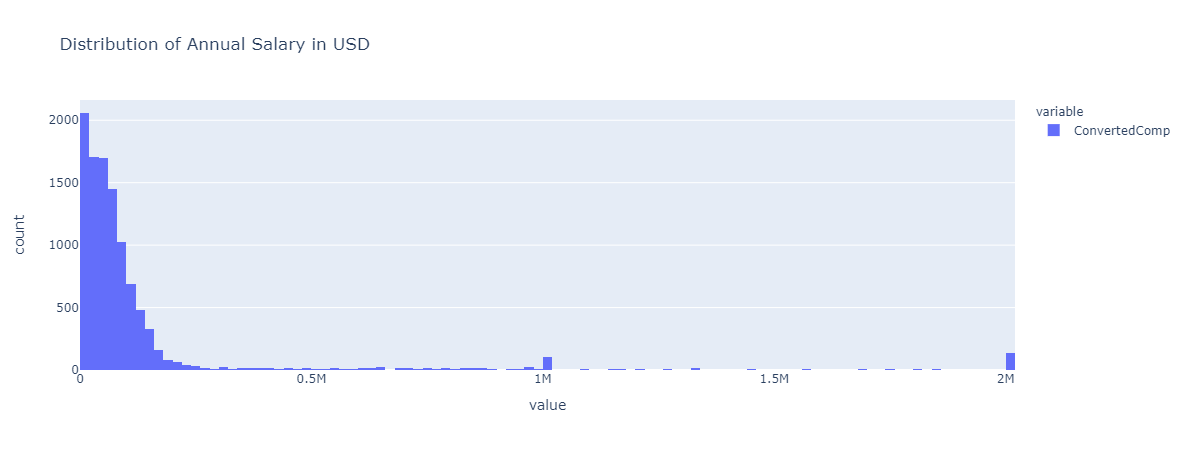

In [27]:
fig = px.histogram(df['ConvertedComp'], title = 'Distribution of Annual Salary in USD')
fig.show()

### Box Plots


Plot a box plot of `Age.`


In [28]:
# Dealing with Age NULL values
df['Age'].replace(np.NaN, df['Age'].mean(), inplace = True)

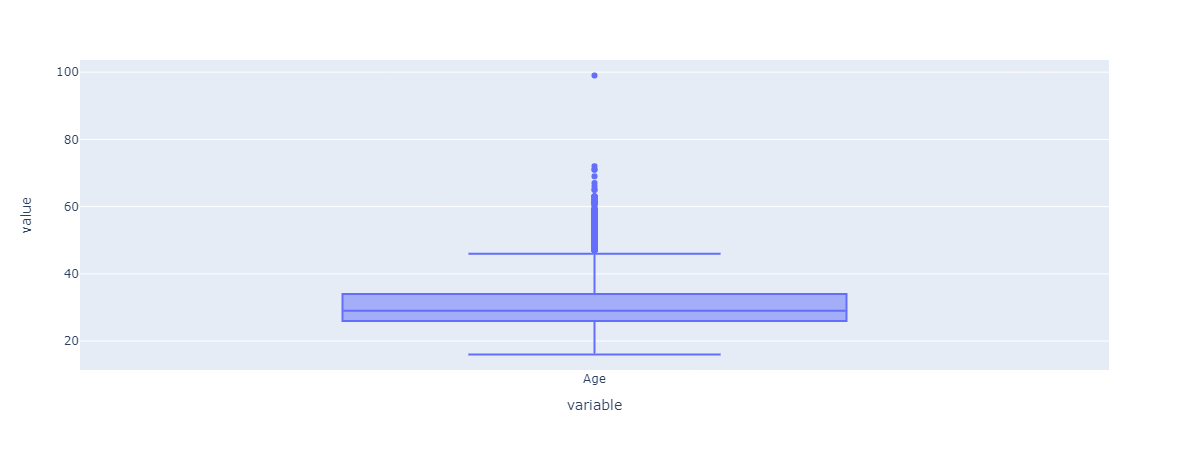

In [29]:
px.box(df['Age'])

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


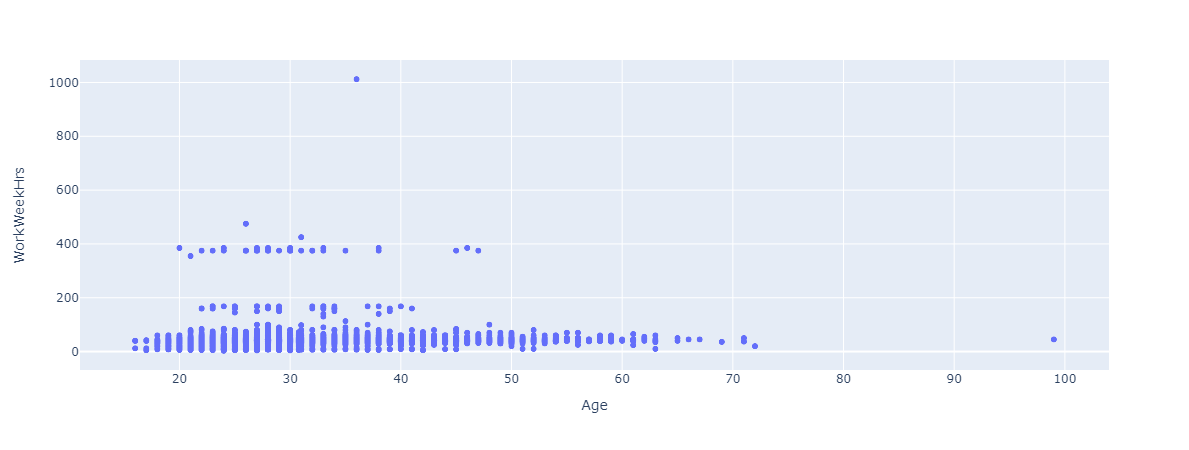

In [30]:
fig = px.scatter(df, x = 'Age', y = 'WorkWeekHrs')
fig.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


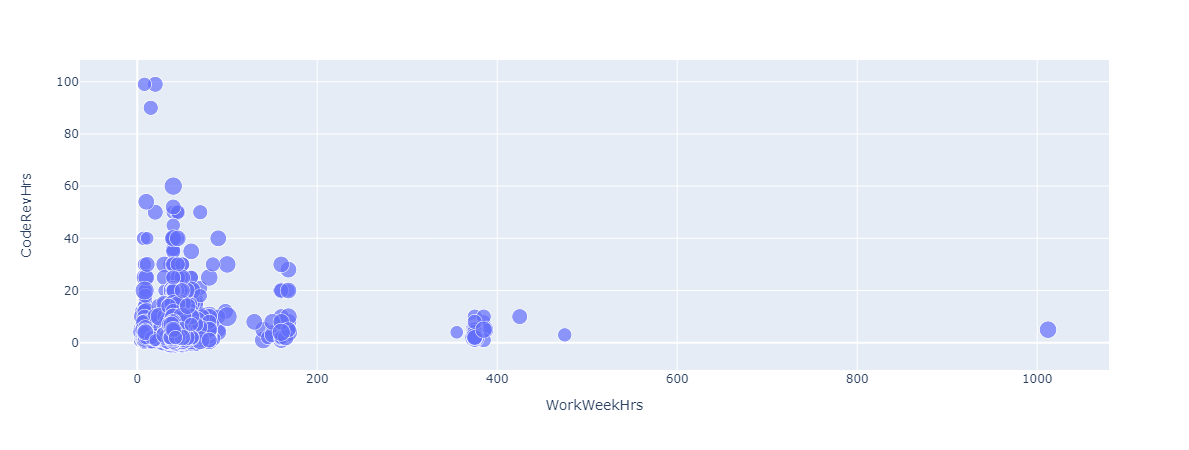

In [32]:
fig = px.scatter(df, x = 'WorkWeekHrs', y = 'CodeRevHrs', size = 'Age')
fig.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [130]:
QUERY = """
SELECT * 
FROM DatabaseDesireNextYear
"""
db_df1 = pd.read_sql_query(QUERY,conn)
db_df1.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [131]:
db_df = db_df1['DatabaseDesireNextYear'].value_counts().reset_index().head()
db_df

,index,DatabaseDesireNextYear
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


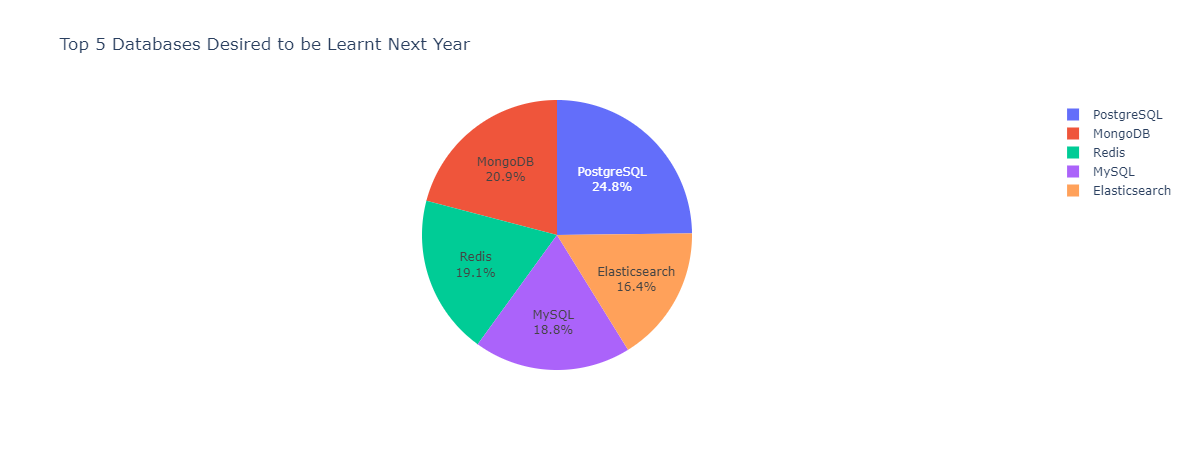

In [132]:
fig = px.pie(db_df, values = 'DatabaseDesireNextYear', names = 'index', title = 'Top 5 Databases Desired to be Learnt Next Year')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [133]:
QUERY = """
SELECT * 
FROM LanguageDesireNextYear
"""
lang_df = pd.read_sql_query(QUERY,conn)

lang_df.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


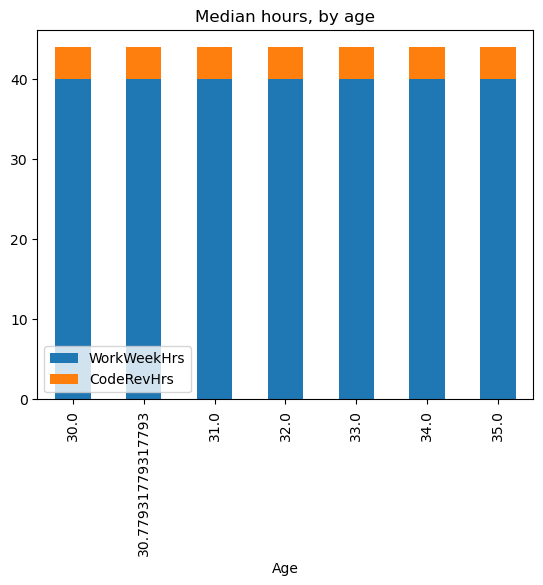

In [67]:
age_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]
order = ['WorkWeekHrs', 'CodeRevHrs']
age_df.groupby('Age')[order].median().plot.bar(stacked=True)
plt.title('Median hours, by age')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [140]:
QUERY = """
SELECT * 
FROM DevType
"""
dev_db = pd.read_sql_query(QUERY,conn)

dev_db['DevType'].value_counts().head()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
Name: DevType, dtype: int64

In [ ]:
age_df2 = df.query('25 <= Age <= 30')
age_df2.groupby('Age')['ConvertedComp'].median().plot.line()
plt.title('Median Annual Salary in USD, by Age')
plt.show()

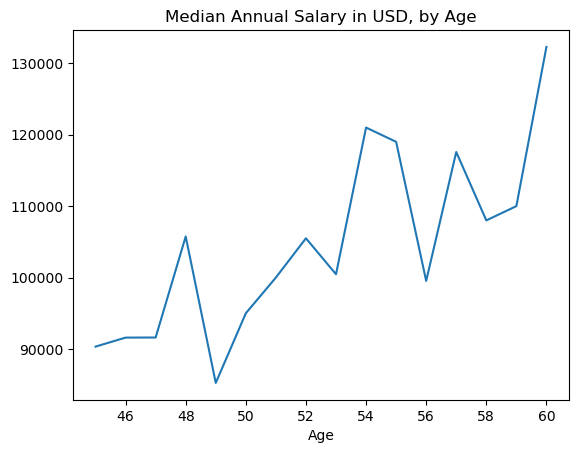

In [68]:
age_df2 = df.query('45 <= Age <= 60')
age_df2.groupby('Age')['ConvertedComp'].median().plot.line()
plt.title('Median Annual Salary in USD, by Age')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


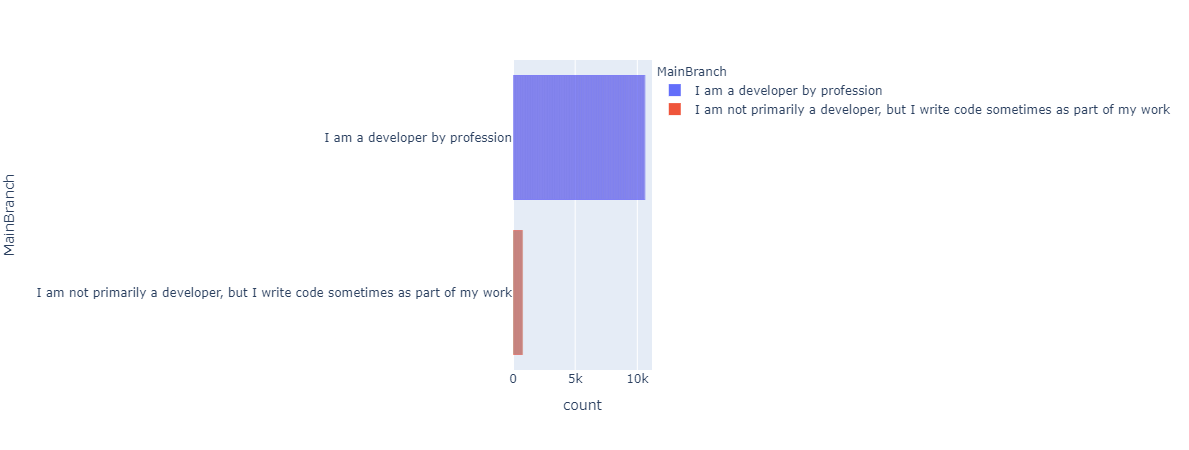

In [86]:
fig = px.bar(df, y = 'MainBranch', orientation = 'h', color = 'MainBranch', width = 1000)
fig.update_traces(marker_line_width = 0)
fig.show()

Close the database connection.


In [87]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
